## Notebook Imports

In [1]:
from sklearn.datasets import load_boston, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

In [ ]:
boston_dataset = load_boston()

## Gather data

Source: [Original research paper](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y)

**Note: Warning when running boston_dataset = load_boston():** 

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing
    dataset. You can load the datasets as follows::

        from sklearn.datasets import fetch_california_housing
        housing = fetch_california_housing()

    for the California housing dataset
    
If this warning is right, we might want to re-do the exercise with the California dataset

In [3]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
df_data = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B','LSTAT'])

In [4]:
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
type(boston_dataset)

sklearn.utils.Bunch

In [6]:
dir(boston_dataset) # dir() looks for a Python object attributes

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [7]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Data Points and features

In [8]:
type(boston_dataset.data)

numpy.ndarray

In [9]:
boston_dataset.data.shape # chaining dot notation

(506, 13)

**Note: Attribute meaning in Python and ML**. "Attribute" is both a concept of Python programming, and also a different concept in ML. We need to understand it can mean two different things: 
- Attribute (programming def.): A specification that defines a property of an object, element, or file. E.g. "shape" is an attribute of "data", which at the same time is an attribute of the "boston_dataset" object.
- Attribute (ML def.): A feature, an independent variable (e.g. number of rooms)

In [10]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Where is the house price? It doesn't seem to be between the features. 
It seems like the house pricing (target variable) is stored in another place within our boston_dataset bunch object. It's in its 'target' attribute:

In [11]:
# Actual prices in thousands (000)
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Data Exploration with Pandas DataFrames

In [12]:
# Create a pandas dataframe
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

# Add column with the price (target)
data['PRICE'] = boston_dataset.target

**Tricks:** 
- We just want to a look at the first rows of our dataset, instead of all, to take a look at the kind of values we'll work with. 2 methods: data.head() to see the first 5 rows, data.tail() to see the last 5 rows.
- We want to know the number of rows we have. We can use the count() method for this. In ML, we might refer to each of this rows as **"instances"**. For programmers, an instance is a different thing.


In [13]:
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [14]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning data
### Check for missing values

In [15]:
pd.isnull(data)

CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

     PTRATIO      B  LSTAT  PRICE  
0      False  False  False  False  
1      False  False  False  False  
2      False  False  False  False  
3      False  False  False  False  
4      False  False  False  False  
..       ...    ...    ...    ...  
501    False  False  False  False  
502    False  False  False  False  
503    False  False  False  False  
504    False  False  False  False  
505    False  False  False  False  

[506 rows x 14 columns]

Pandas will output the full table. If we want to quickly see if there are any missing values, we can run this sentence to see if there's any missing values in any of the columns (not in our case):

In [16]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

We also have an alternative for doing the same without using panda:

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualising Data - Histograms, Distributions, and Bar Charts

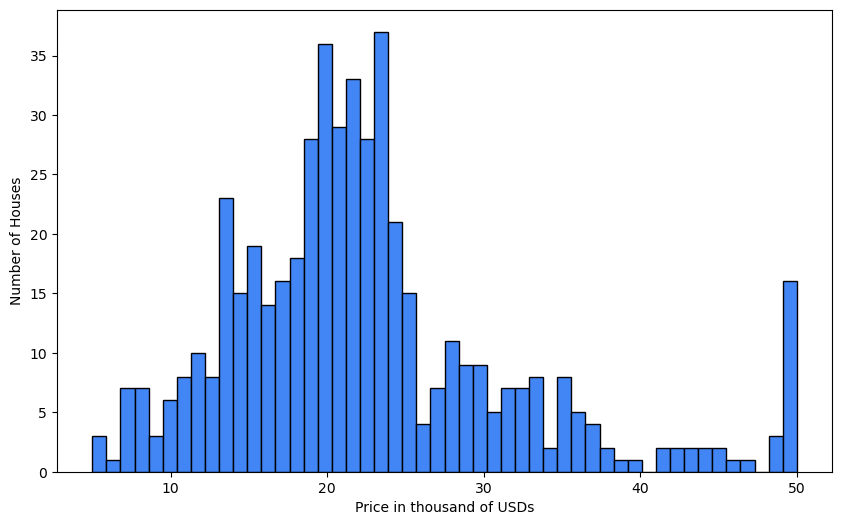

In [18]:
plt.figure(figsize=(10,6))
# bins determines how are prices grouped together to form bars.
# AKA with bins, we can define how granular our histogram looks
plt.hist(data['PRICE'], bins=50, ec='black', color='#4285F4')
plt.xlabel('Price in thousand of USDs')
plt.ylabel('Number of Houses')
plt.show()

Another great visualisation module is [seaborn](https://seaborn.pydata.org/). After importing it, let's try its `distplot` function, which with we get both a histogram and a probability density function (the line over the histogram). This line estimates the distribution of the data:

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


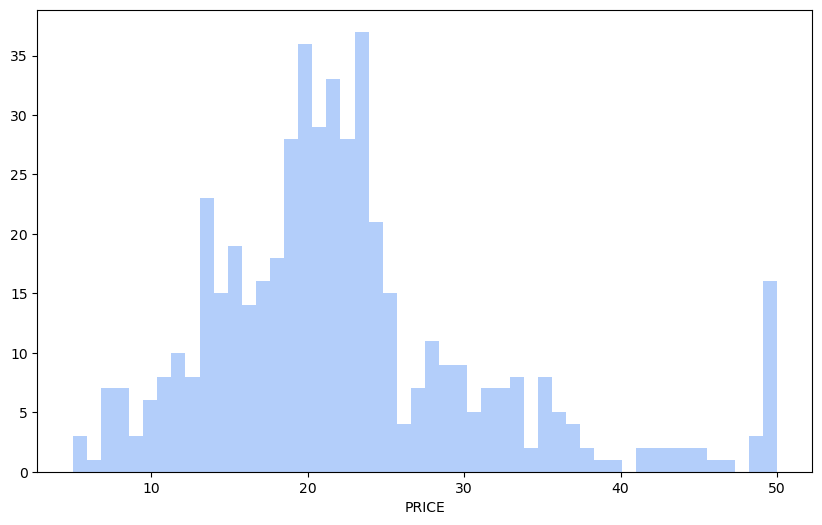

In [19]:
# Note: It seems like distplot is deprecated. We'll use it anyway because the alternatives are not great
plt.figure(figsize=(10,6))
sns.distplot(data['PRICE'], bins=50, kde=False, color='#4285F4') # We could hide both the histogram and the prob density function with hist=False or kde=False
plt.show()

**Challenge:** Plot in a histogram the Avg number of rooms per dwelling (RM feature).

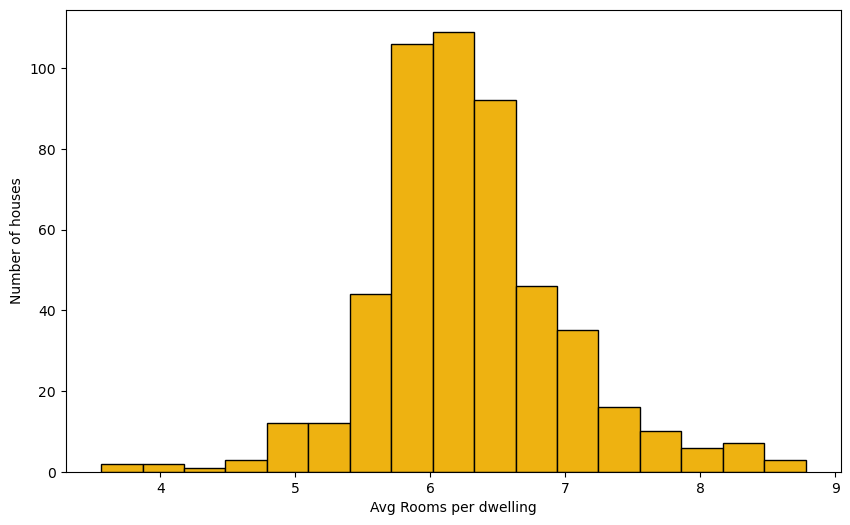

In [20]:
plt.figure(figsize=(10,6))
# bins determines how granular our histogram looks
plt.hist(data['RM'], bins=17, ec='black', color='#eeb211')
plt.xlabel('Avg Rooms per dwelling')
plt.ylabel('Number of houses')
plt.show()

In [21]:
# If we wanted to know the exact number of Avg rooms in Boston, pandas' mean method can help:
avg_rooms = data['RM'].mean()
print('The avg nb of rooms in Boston\'s houses is', avg_rooms)

The avg nb of rooms in Boston's houses is 6.284634387351779


**Challenge:** Investigate the 'RAD' feature (index of accessibility to radial highways), generate a histogram with Matplotlib. What is this feature telling us?

**Challenge 2:** Leave some space between bars by looking at the matplotlib's documentation.

_Answer_ (Source: [StackOverFlow thread](https://stackoverflow.com/questions/25394913/spacing-between-bars-in-matplotlib-hist-with-thousands-of-bins)): The parameter 'rwidth' specifies the width of your bar as a fraction of your total bin width. E.g. if your bin width is say 1 and rwidth=0.5, the bar width will be 0.5. On both side of the bar you will have a space of 0.25.

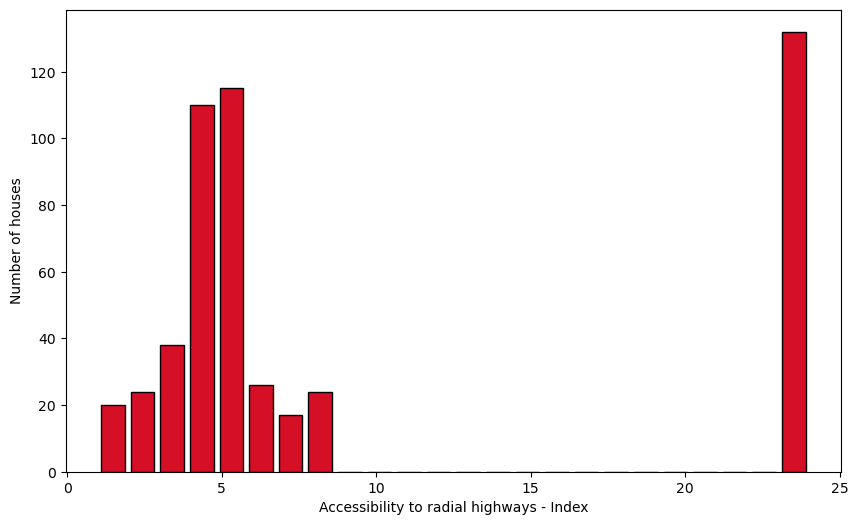

In [22]:
plt.figure(figsize=(10,6))
plt.hist(data['RAD'], ec='black', bins=24, rwidth=0.8, color='#d50f25') # Automatic binning lets Matplotlib decide
plt.xlabel('Accessibility to radial highways - Index')
plt.ylabel('Number of houses')
plt.show()

In [23]:
# Let's investigate the number of observations for each value
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

As we see the index goes up to 24, we assign "24" to the bin parameter.

In [24]:
frequency = data['RAD'].value_counts()
type(frequency)

pandas.core.series.Series

I just want to access the labels of the unique index values (left column above). The frequency is a series (similar to a column). I can access this unique values with .axes[0], or with the index attribute (both return the same):

In [25]:
# frequency.axes[0]
frequency.index

Float64Index([24.0, 5.0, 4.0, 3.0, 6.0, 2.0, 8.0, 1.0, 7.0], dtype='float64')

Let's print our histogram:

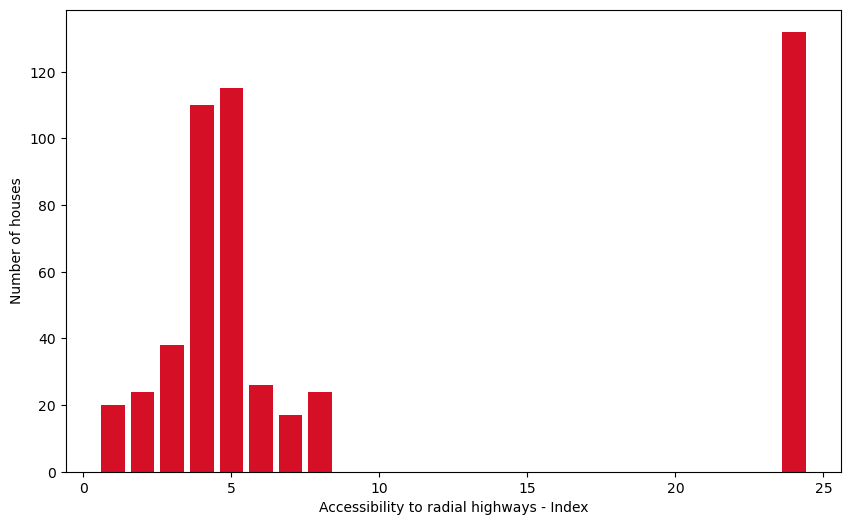

In [26]:
plt.figure(figsize=(10,6))
plt.xlabel('Accessibility to radial highways - Index')
plt.ylabel('Number of houses')
plt.bar(frequency.index, height=frequency, color='#d50f25') #plt.bar(x_axis, height of individual bars)
plt.show()

Here we haven't needed to specify the number of bins. Instead, we provided the "value_counts", with which we avoid to hard-code the granularity.

**Challenge:** For all the houses in the dataset, how many are next to the Charles River?

In [27]:
# I see we need to look at the 'CHAS' feature. 1 = Next to the river, 0 = Otherwise.
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

This type of feature -an indicator variable used for creating categories- is called a **_Dummy Variable_**

In [28]:
print('There are', data['CHAS'].value_counts()[1],'properties on the Charles River')

There are 35 properties on the Charles River


## Descriptive statistics

Descriptive statistics, together with visualisations, are a great way to explore our data.

### Mean vs Median
- Mean = Average. The central value, calculated as the sum of all values divided by the number of items.
- Median. The midpoint of the distribution, the middle value.
Both of them are descriptive statistics. In a normal distribution, both the median and the mean would be the same. In non-normal distribution (most of them), they don't coincide.

We'll calculate some descriptive statistics using Pandas methods:
- Smallest value
- Largest value
- Mean value
- Median value

In [29]:
data['PRICE'].min()

5.0

In [30]:
data['PRICE'].max()

50.0

In [31]:
# If instead of a single column we want to see all max/min values, we run:
data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [32]:
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [33]:
data.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICE       21.20000
dtype: float64

For **easily having a glance of all descriptive statistics, we can run describe()**

In [34]:
data.describe() # 50% = Median

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

## Correlation

Correlation is the degree to which variables move together. It can be positive or negative, and can be stronger or weaker -or zero / no correlation-. It's goes from -1 to +1.
#### $$ \rho _{XY} = corr(X,Y)$$
#### $$ -1.0 \leq \rho_{XY} \leq +1.0 $$

In [35]:
# Correlation between the number of rooms of a property, and its price:
data['PRICE'].corr(data['RM'])

0.6953599470715393

In [36]:
# Correlation between the property prices and the pupil teacher ratio:
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375616

In [37]:
# Calculate all correlations at the same time:
data.corr() 

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

Clicking shift+tab on data.corr() we can see that we could set some optional parameters in this method, including "method". There are different ways to calculate the correlation. The type we're using (default) is **Pearson Correlation**.

Apart from the strengh and direction, there's another aspect to have into account about correlation. Having high correlation between our features **could** be problematic. It can lead to having reduntant features. This is called **Multicollinearity**, when 2 or more predictors are highly related to one another, and they don't provide unique and independent information, which can lead to unreliable estimates and nonsensical findings. However, having high correlation between features doesn't necessarily imply we have multicollinearity, what it does imply, is that we should investigate why this correlation is so high: they could be redundant, or not.

### Correlations investigation

Let's make the previous table clearer, hiding the half information that is duplicated (as pearson correlation is bidirectional). We'll do this creating an array called mask.

In [38]:
# Let's filter the duplicated indexes
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True # Setting a '1' for all positions in the upper triangle

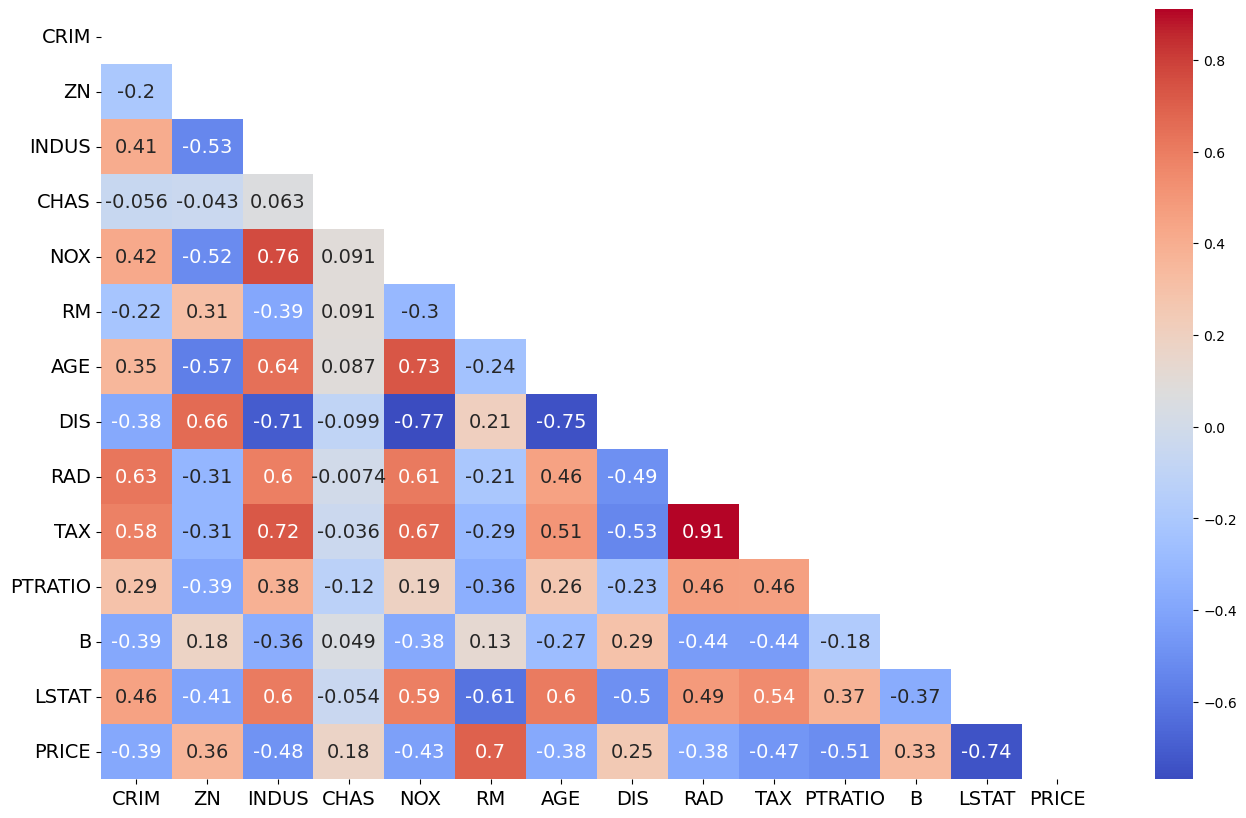

In [39]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size":14}, cmap='coolwarm') # Masking duplicate values
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, rotation=0)
plt.show()

Let's look at strenght and direction of some correlations:
- **Corr btw NOX and INDUS** is quite strong (0.76). INDUS measures the amount of non-retail businesses in the area, while NOX measures the nitric oxides concentration. Does this correlation make sense? Yes, it does make sense that in industrial areas the pollution is higher.
- **Corr btw TAX and INDUS** is quite high too (0.72). Tax measures the property-tax rate. So this means the more industrial an area is, the more taxes are paid for the a property. Curious.
- **Corr btw TAX and RAD** is super high(0.91). So the better the accessibility to radial highways is, the higher taxes are paid for a property.
- As said, we are applying Pearson Correlation method, which makes some assumptions about the input data. In fact, **Pearson Correlation is only valid for continuous data**, which means that it doesn't work for dummy variables like "CHAS - 0 or 1 depending on if the property is by the river or not". RAD is also a non continuous variable, but an index (discrete value), so this 0.91 correlation with TAX is not valid.
- Let's see the correlations with PRICE:
    - The lowest one is the one with CHAS, but as this is a dummy variable it doesn't count. 
    - The next lowest one is with DIS, the distance to five Boston employment centres. Curious.
- If we take a further look at **DIS, we'll see it has a strong negative correlation with the INDUS one (-0.71)**. This indicates that the industrial areas are close to the employment centers, which makes sense -maybe some industrial areas are directly this 5 employment centres-. This should make us think: **Does the DIS variable add value to our model, if we already have the INDUS one? If a feature isn't adding any explanatory value, it's better to exclude it** from our model in order to make our it simpler.

So, we have identified some strong correlations. Now we should:
1. Simplify by excluding irrelevant data.
2. Test for multicollinearity

**Important note 1:** Correlation doesn't imply causation. Just because 2 things move together, it doesn't mean that one implies the other.

**Important note 2:** Correlation measures linear relationships only. It's important to look at correlations together with visualisations in order to interpret them correctly.

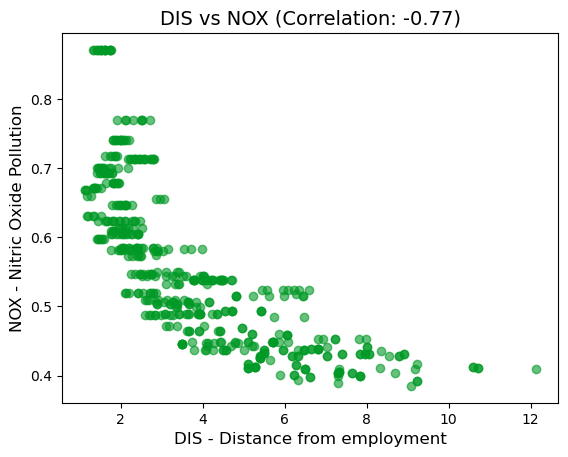

In [40]:
# Challenge: Picture the relationship between pollution and distance to employment
# centers in your head. THen create a scatter plot between DIS and NOX.

plt.scatter(data['DIS'], data['NOX'], c='#009925', alpha=0.6)
plt.xlabel('DIS - Distance from employment', size=12)
plt.ylabel('NOX - Nitric Oxide Pollution', size=12)

# Let's add the correlation info also on the title, using Python's \f:
nox_dis_corr = round(data['NOX'].corr(data['DIS']),2) # Rounded to 2 decimals
plt.title(f'DIS vs NOX (Correlation: {nox_dis_corr})', fontsize=14)


plt.show()

Another way to style scatter plots:

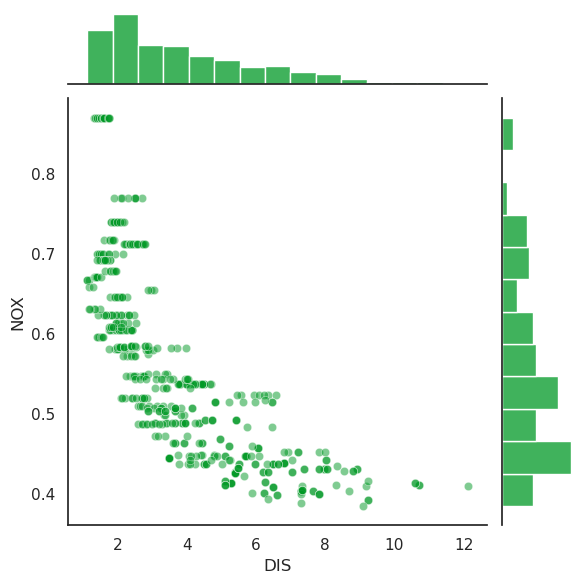

In [41]:
#jointplot() - seaborn's method to create scatter plots
sns.set() # reseting the styling to the default
sns.set_style('white') # allows us to choose template, e.g. white, whitegrid, etc. We can see them with shift+Tab
sns.jointplot(x=data['DIS'], y=data['NOX'], color='#009925', joint_kws={'alpha':0.5}) #joint_kws goes to a Pthon dictionary (key-value pair) where we can specify things like the transparency
plt.show()

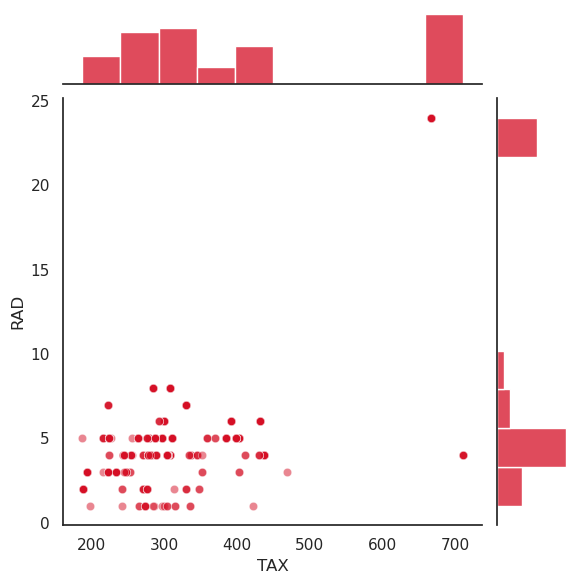

In [42]:
#jointplot() - seaborn's method to create scatter plots
sns.set() # reseting the styling to the default
sns.set_style('white') # allows us to choose template, e.g. white, whitegrid, etc. We can see them with shift+Tab
sns.jointplot(x=data['TAX'], y=data['RAD'], color='#d50f25', joint_kws={'alpha':0.5}) #joint_kws goes to a Pthon dictionary (key-value pair) where we can specify things like the transparency

plt.show()

This "weird" correlation plot is due to the fact that RAD and TAX are not continous features, and also due to the 2 big otliers we have at the right part of the plot.

Let's now plot a linear regression between this two features. We'll use seaborn this time:

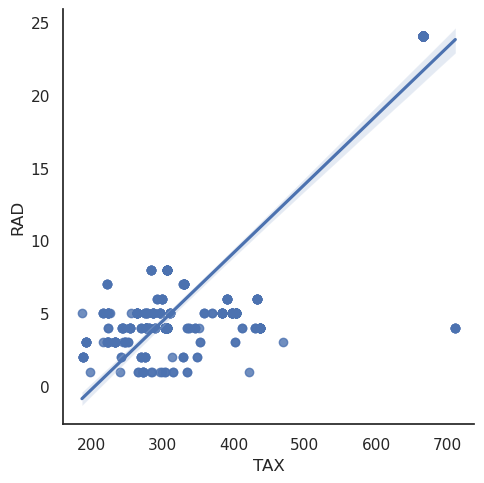

In [43]:
sns.lmplot(x='TAX',y='RAD', data=data) # data is our dataset, our Python dataframe
plt.show()

Let's interprete this:
- The datapoints in the upper-right corner are making our regression line be steeper. 
- There's not a clear relationship between the high correlation we have (0.91) and the correlation plotted (as it's not linear).

In this case, we're forcing a linear regression model into a dataset that is not prepared to be fitted into it. So our model might not be very good.

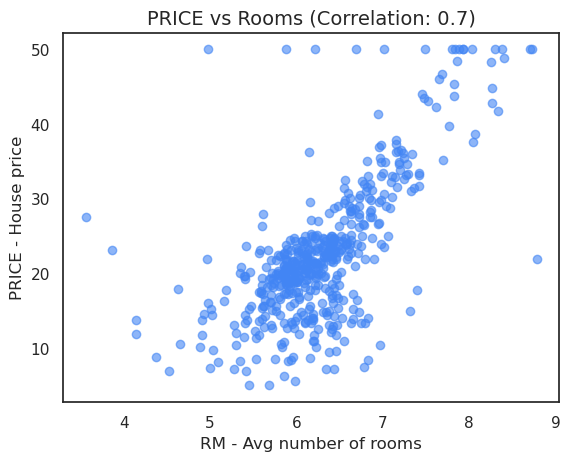

In [44]:
# Challenge: Create a scatter plot between the hose prices and the number of rooms

plt.scatter(data['RM'], data['PRICE'], c='#4285F4', alpha=0.6)
plt.xlabel('RM - Avg number of rooms', size=12)
plt.ylabel('PRICE - House price', size=12)

price_rm_corr = round(data['PRICE'].corr(data['RM']),2)
plt.title(f'PRICE vs Rooms (Correlation: {price_rm_corr})', fontsize=14)


plt.show()

Some observations:
- Our 0.7 correlation tights nicely to what we're seeing in the scatterplot. There's a very clear relationship between the number of rooms and the price.
- There's a curious ceiling at around 50K prices. There's a lot of data points on that line. It can be casuality, but it migt have something to do with how the data was collected on the 1970's, or with a feature we're missing. For the purpose of learning, let's not dig deeper on this :)

We've got like 30 variables, there's a lot of possible combinations. We won't plot each of them one by one, but seaborn has a great feature for that called pairplot().

**Trick:** Compute-heavy calculations like the ones `pairplot()` needs to do usually take a lot of time. We can use Jupyter Notebook's **`%%time`** magic command to measure the time that a cell takes to run. This is called micro-benchmarking.

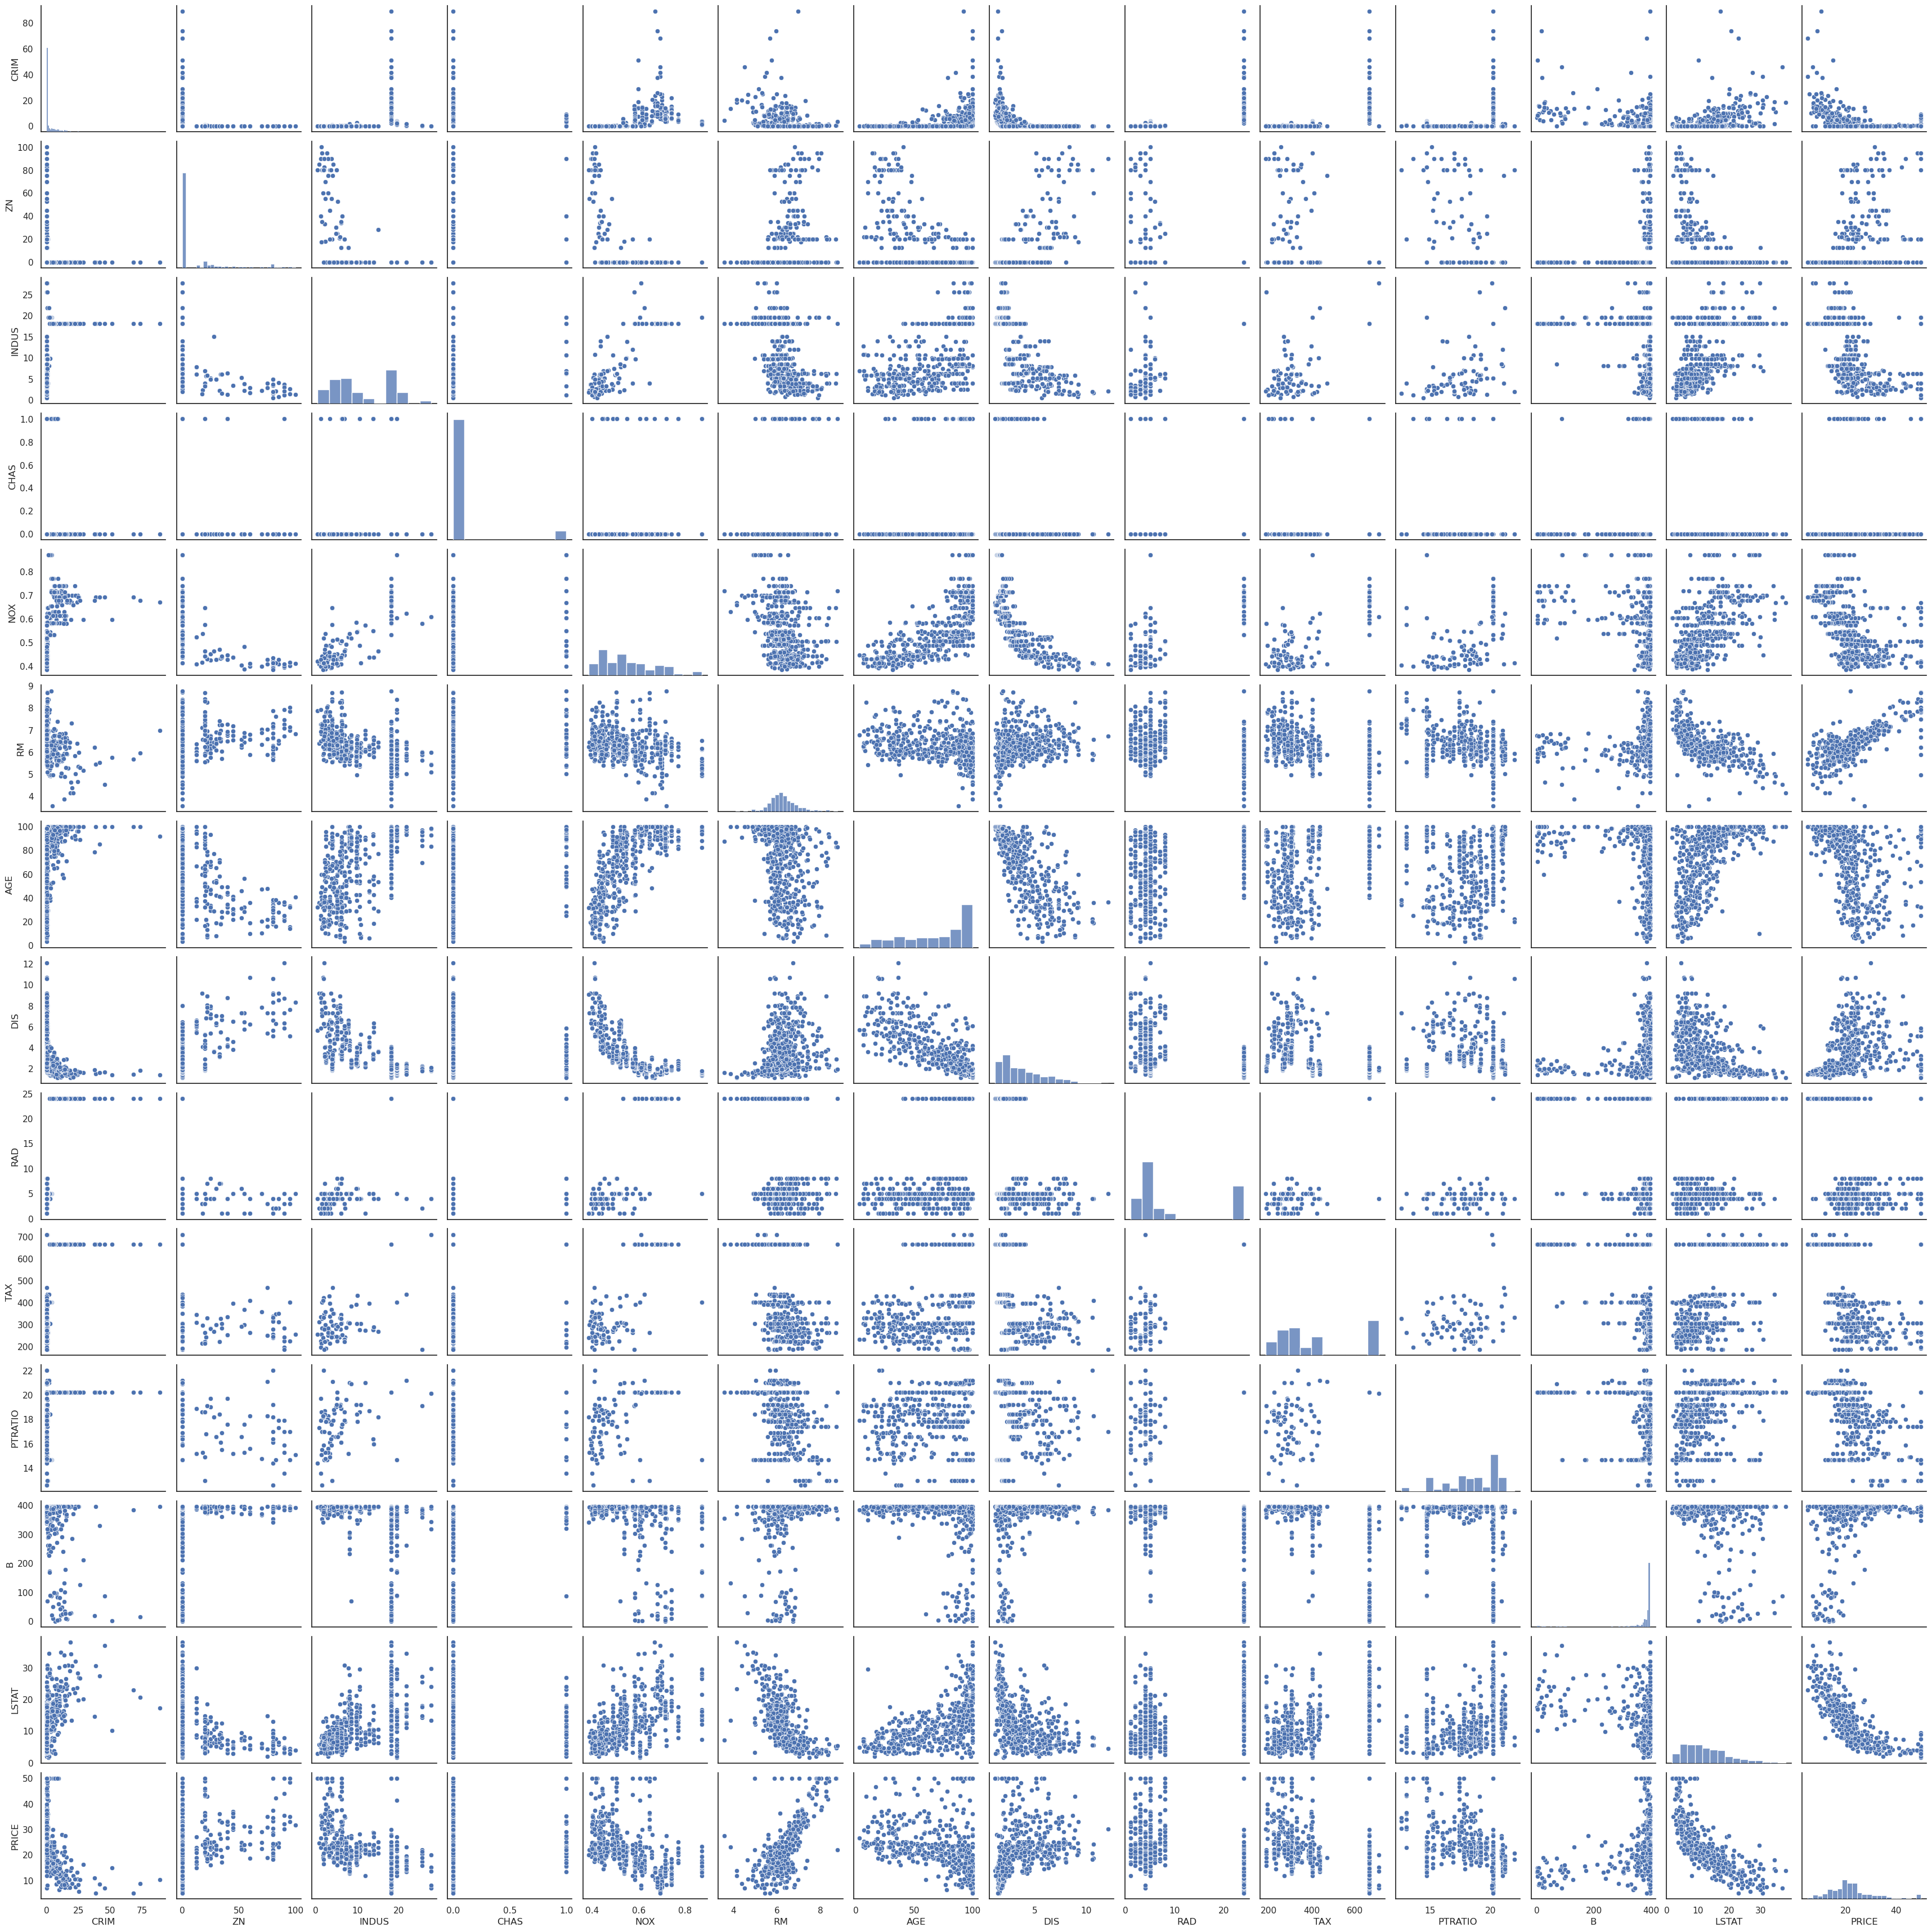

CPU times: user 36.5 s, sys: 542 ms, total: 37 s
Wall time: 36.6 s


In [45]:
%%time

sns.pairplot(data)
plt.show()

Downloading the image and zooming, we can see that:
- In the diagonals (correlation between each feature and itself) we can see each histogram or distribution.
- In the last raw we have the correlation between the price and all the other variables. We can see that some of them indeed have a clear relationship, e.g. CRIM, INDUS, NOX, RM, or LSTAT (% "lower status" in terms of education level or kind of job...)

Let's now draw a linear regression in each of these plots! We can do that with the `kind` argument of seaborn:

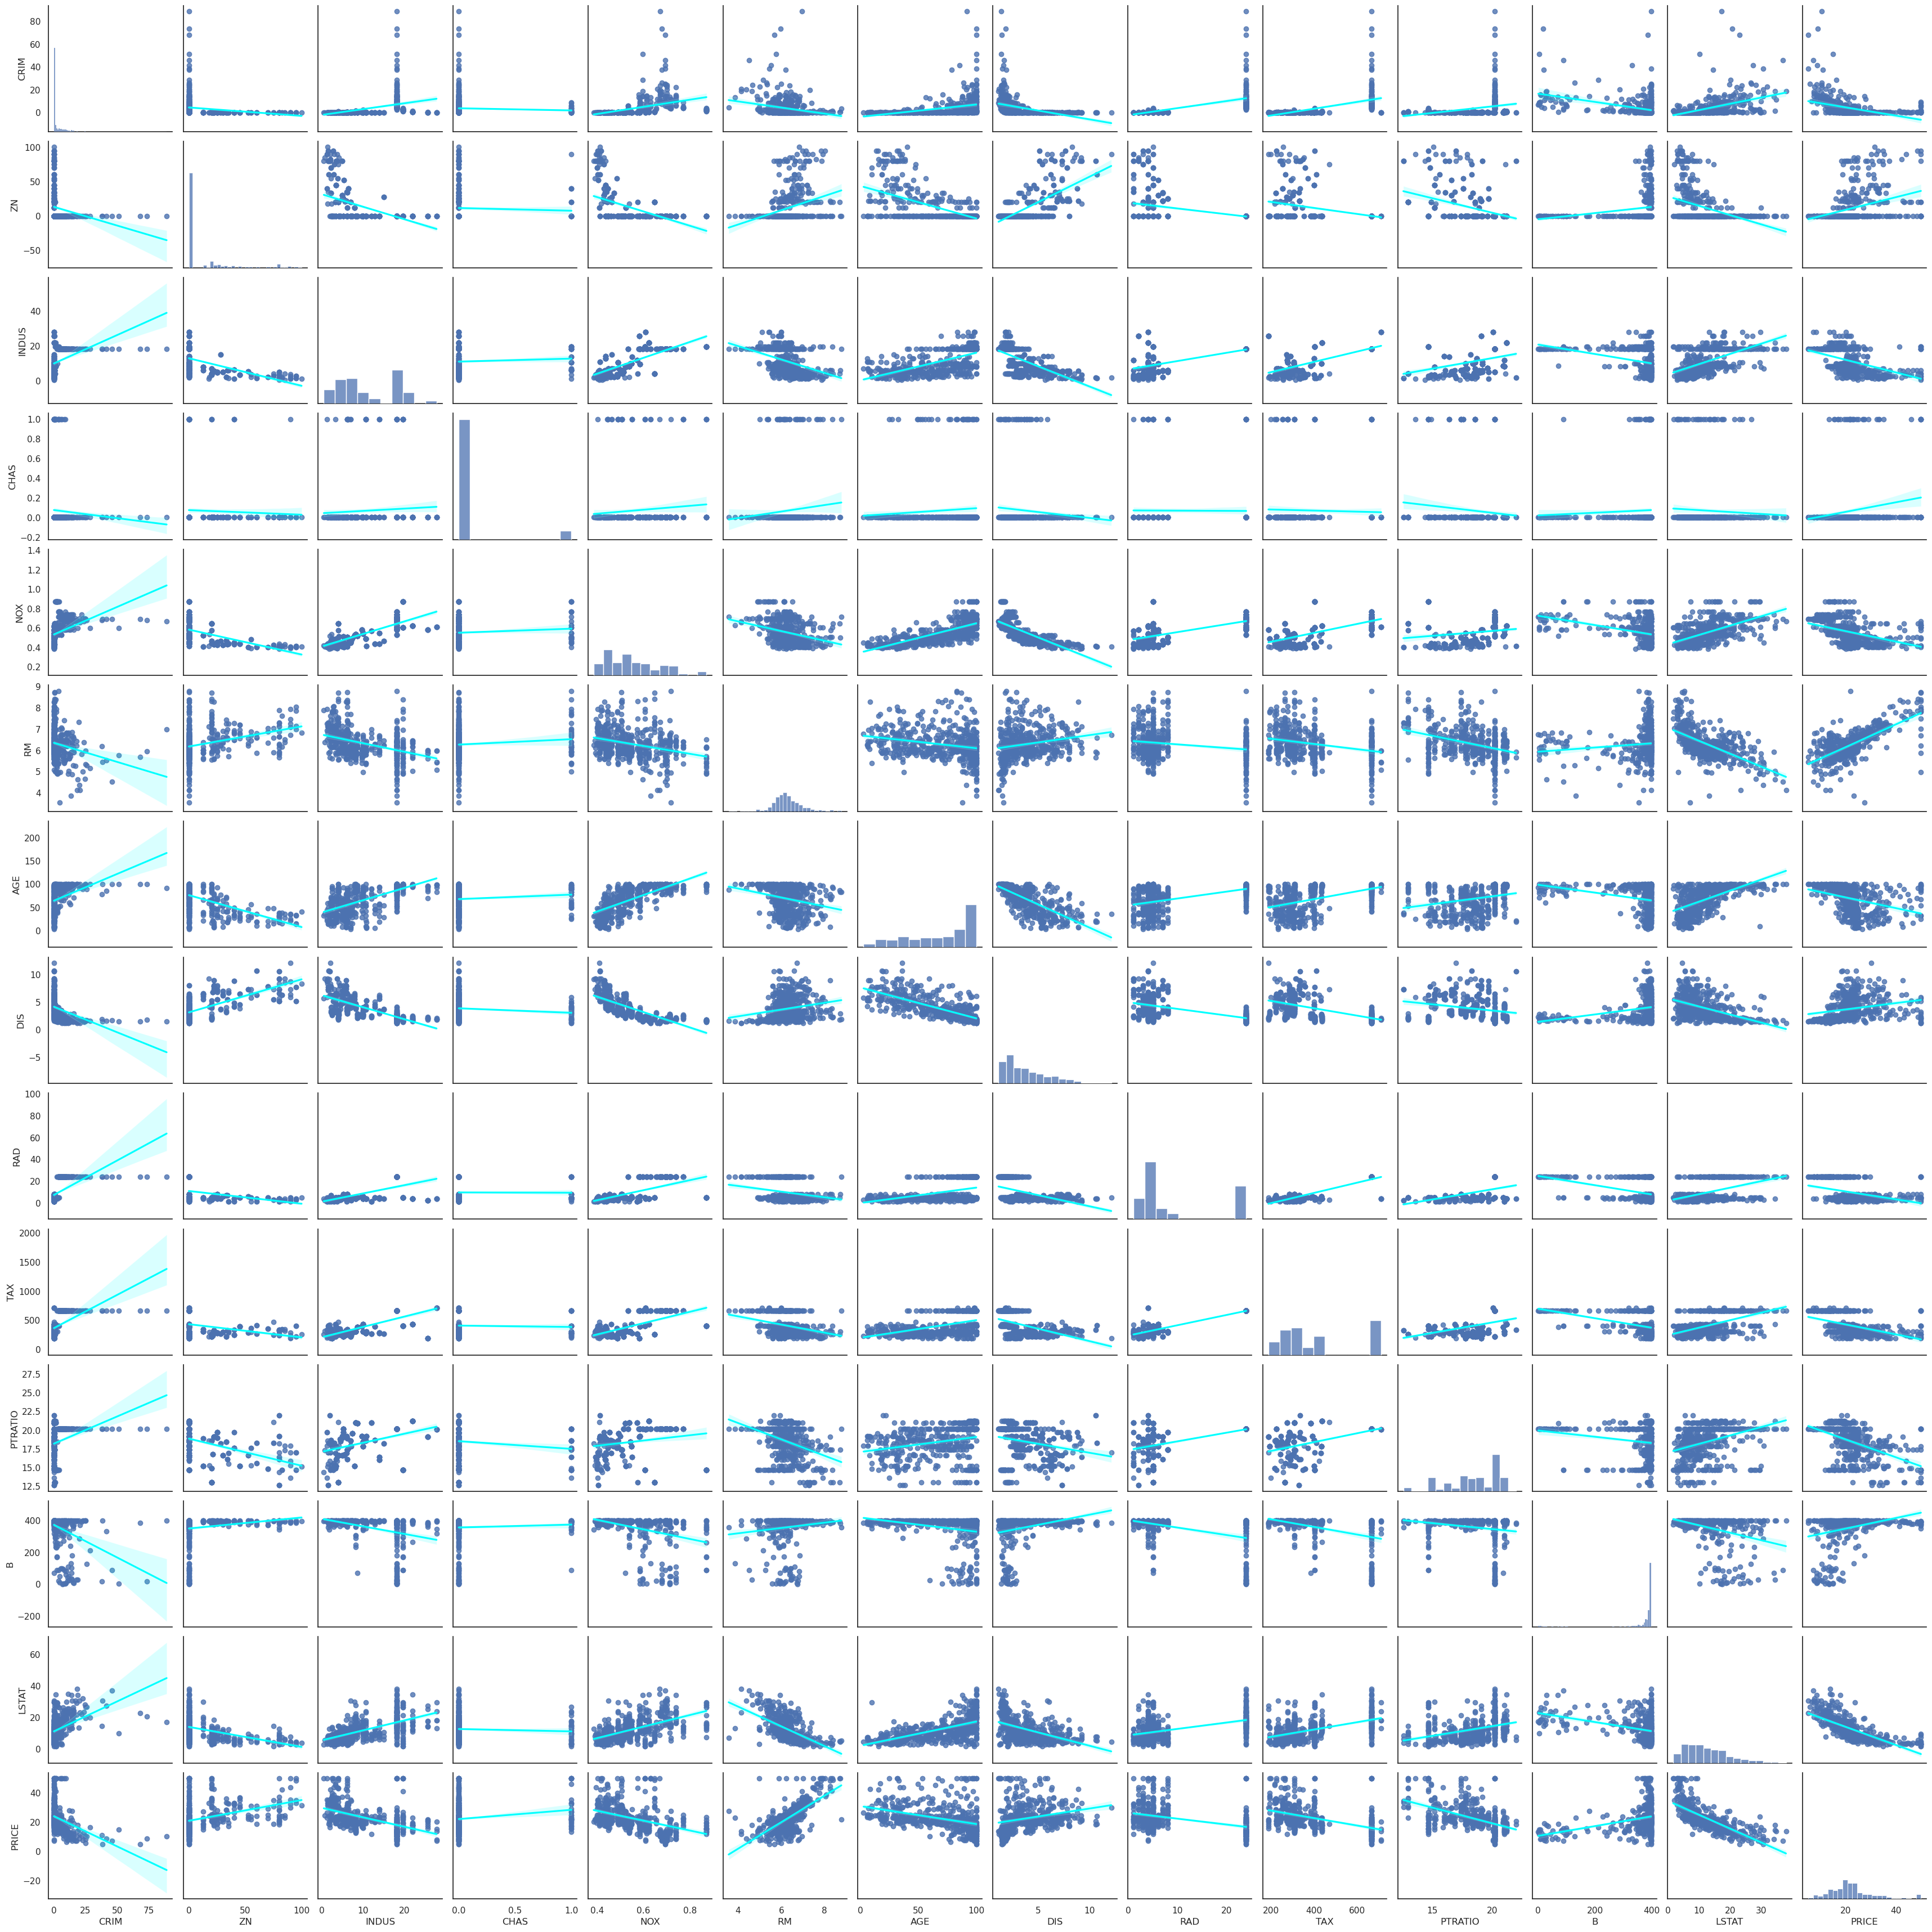

CPU times: user 58.5 s, sys: 528 ms, total: 59 s
Wall time: 58.6 s


In [46]:
%%time

sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color':'cyan'}})
plt.show()

Now, let's take all these linear regressions and run a **multivariable linear regression model**!

## Multivariable regression

In our linear regression model, we had our equation: $$\hat{y} = \theta_0 + \theta_1x$$

In multivariable regression, our equation looks like this:
$$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$$

In this case, we have 13 features, so we'll have 14 thetas:
$$\hat{PRICE} = \theta_0 + \theta_1 RM + \theta_2 NOX + ... + \theta_{13} LSTAT$$

### Training & Test Dataset Split
We're going to start by shuffling our data and splitting it into training and test data.

In [47]:
prices = data['PRICE']
features = data.drop('PRICE', axis=1) # We're dropping the price column from our dataset

# train_test_split() returns 4 values: A test and a training dataset for both our features and
# our targets. Let's do tuple unpacking to store each of the outputs in a different variable
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state=10) 
# Our testing dataset will be the 20% of our data:
len(X_train)/len(features)
# We're suffling randomly, setting "10" as the starting point.

0.7984189723320159

Let's train our linear regression:

In [48]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef']) #.columns attribute shows the column names

Intercept 36.533051382824404


coef
CRIM     -0.128181
ZN        0.063198
INDUS    -0.007576
CHAS      1.974515
NOX     -16.271989
RM        3.108456
AGE       0.016292
DIS      -1.483014
RAD       0.303988
TAX      -0.012082
PTRATIO  -0.820306
B         0.011419
LSTAT    -0.581626

All these $$\theta_1$$ values make rational sense. Our model now is very easy to understand, E.g.:
- Leaving next to the river (CHAS) has a coef around 2. This represents a slope=2, and as CHAS was a dummy value that could just be 0 or 1, we can see that the difference from living by the river is of 2 (thousand USDs) compared with not living there. See image: 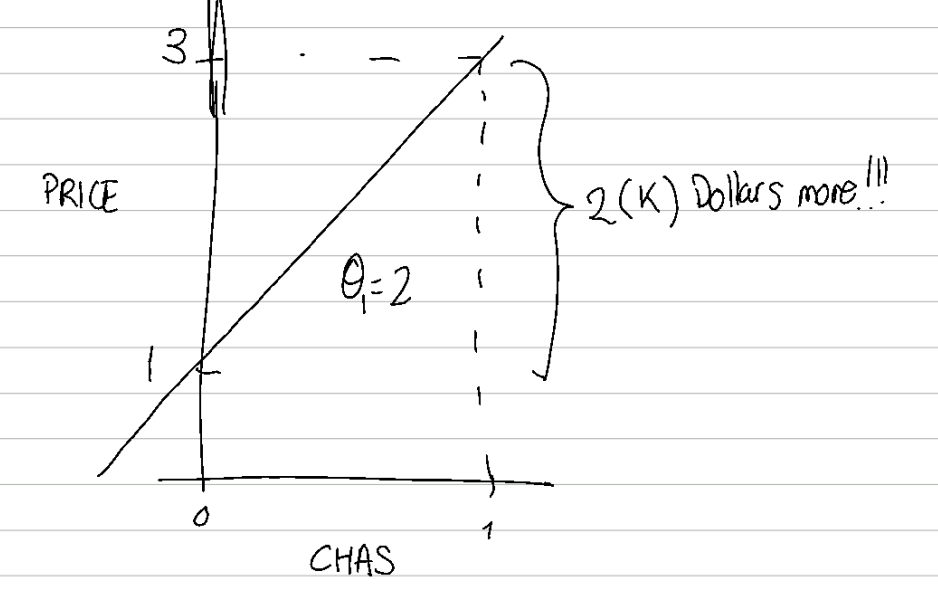

So now we can write our equation with all the coefs:
$$\hat{PRICE} = 36.6 + 3.1 RM - 16.3 NOX + ... - 0.6 LSTAT$$
And therefore we can know how much a change in any of the features could affect the house's price. E.g. Having one more room, would theoretically mean an increase of 3,100$ in the house price.

In [49]:
# Challenge: Print the R-squared for the training and test datasets

In [50]:
print('R-squared training = ', regr.score(X_train, y_train))
print('R-squared test = ', regr.score(X_test, y_test))

R-squared training =  0.750121534530608
R-squared test =  0.6709339839115647


Both R-squared values are quite high: We can explain around 70% of what's going on.

But, **why is R-squared lower for the test dataset?** What we've done so far is to calculate the thetas only on our training data. Our model hasn't seen our testing data yet, and therefore, the proportion of the variance in our data explained by our model is going to be lower for sure (and more realistic).

#### Difference between RSS and R-squared
R-squared or $$R^2$$ represents the proportion of the variance in your data which is explained by your model, from 0 to 1 (it's a %); the closer to one, the better the fit.

The residual sum of squares (RSS) is the sum of the squared distances between your actual versus your predicted values:

#### $$RSS = \sum_{i=1}^{n}  \big( y^{(i)} - h_\theta x^{(i)}  \big)^2$$

Where 𝑦𝑖 is a given datapoint and 𝑦̂ 𝑖 is your fitted value for 𝑦𝑖.

The actual RSS number you get depends largely on the scale of your response variable. Taken alone, the RSS isn't so informative.

Why? Picture your residuals as a vertical line connecting your actual values to your predicted value. If your y-axis is on a different scale, the number you get will be very different.

E.g. consider that your y-axis were kilometers, and a given point is about 0.5km away from your line of best fit. Then, the residual on that given datapoint is 0.5. However, if your scale is meters, then that same datapoint has a residual of 500. Your RSS will be much larger, but the fit (R-squared) does not change at all; in fact the data don't change at all either. But the RSS changes drastically.

### Model evaluation

We'll check for possible problems and areas of improvement, and retrain our model if necessary for improving the performance. 

Some statistical values that can help us identify improvements:
- R-squared
- P-values
- V.I.F
- BIC

#### Data Transformations
If we check the prices histogram, we can see we have a big outlier in the tail values (right part, the higher ones), as opposed to what a normal-ish distribution should be:

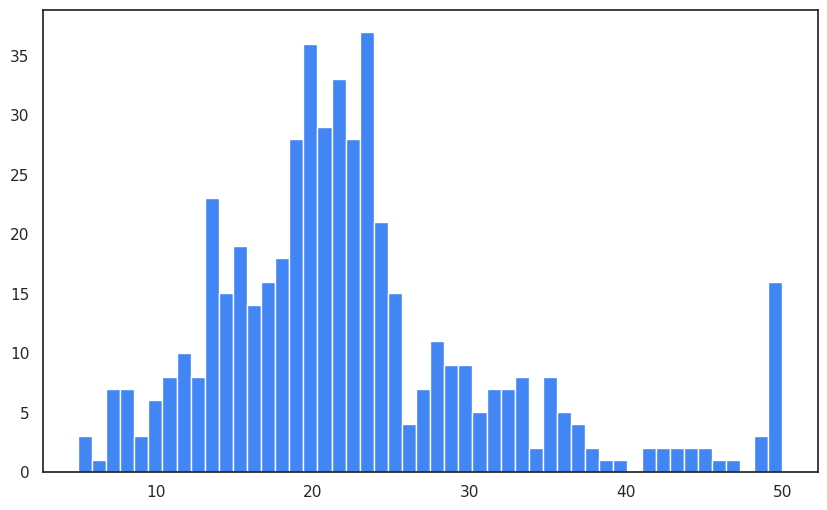

In [51]:
plt.figure(figsize=(10,6))
plt.hist(data['PRICE'], bins=50, color='#4285F4')
plt.show()

Having more datapoints in one of the tails is called a "skew". Our data is skewed. Let's measure how much:

In [52]:
data['PRICE'].skew()

1.1080984082549072

The skew represents the variation between the left tail (all points from the median to the left) and the right tail (all points from the median to the right). In other words, skewness defines the asymmetry of a distribution. In a normal distribution, as it's symmetric, the skew is = 0. More info [here](https://statisticsbyjim.com/basics/skewed-distribution/).

We probably can do something to improve our model: transform our price data for decreasing its skew before running our regression. E.g. we could do something with our prices that shifts the distribution. Let's do a log transformation for this:
- If  PRICE = 7 -> ln(7) = 1.95    #change of -5.05
- If  PRICE = 50 -> ln(50) = 9.3    #change of -46.09

Logarithmic transformations make small changes in small values, and large changes in higher values. They usually convert a curve (e.g. exponential) into something much more fittable to a linear regression.  
So, the issue is that we have some non-linearities but are using a linear model. We can either use a different model or we can transform the data to make it more linear (and imporve fit). This is why we transform the price data into log prices. Why not scale the entire dataframe? The log transformation is not appropriate for all variables. It's case by case, and in the case of the price, it looks like it should work (seeing its distribution).

In [53]:
y_log = np.log(data['PRICE']) # np.log represents the neperian log
y_log.tail() # shows the last 5 values, head() the first 5

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, dtype: float64

In [54]:
y_log.skew()

-0.33032129530987864

We can see the skew is now much lower, which is good. Let's take a look at its distribution:

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


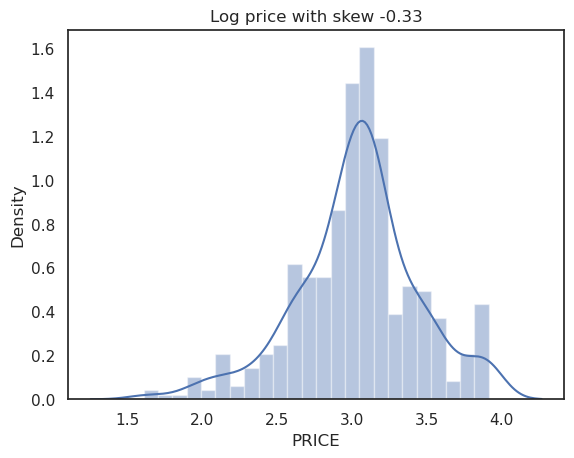

In [55]:
sns.distplot(y_log)
plt.title(f'Log price with skew {round(y_log.skew(),2)}')
plt.show()

It looks a lot more symmetrical. Let's see it in combination with some feature:

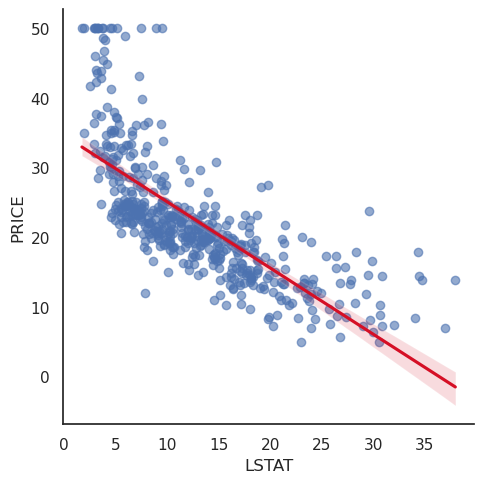

In [56]:
sns.lmplot(x='LSTAT', y='PRICE', data=data, scatter_kws={'alpha':0.6}, line_kws={'color':'#d50f25'})
plt.show()

Looking at this, it seems like the relationship between PRICE and LSTAT could not be linear. Now with the log data:

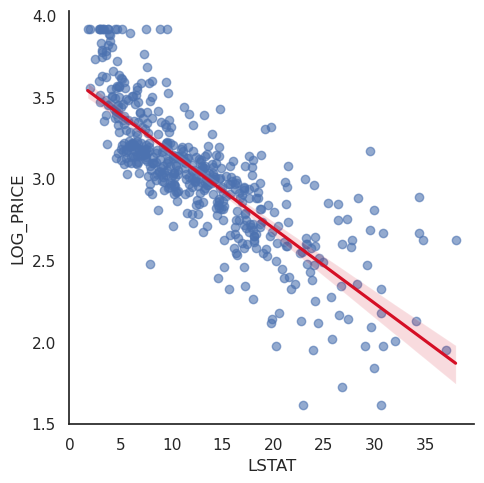

In [57]:
transformed_data = features # Create a new dataframe for transformed data
transformed_data['LOG_PRICE'] = y_log # Adding a new column for the log prices

sns.lmplot(x='LSTAT', y='LOG_PRICE', data=transformed_data, scatter_kws={'alpha':0.6}, line_kws={'color':'#d50f25'})

plt.show()

We may be able to appreciate a little difference, but it's hard to do it visually. Let's better re-run our linear regression, now with our transformed data, and see the result.
Now we've got a different model, so our equation has changed:
$$log(\hat{PRICE}) = \theta_0 + \theta_1 RM + \theta_2 NOX + ... + \theta_n LSTAT$$

As we changed the price, it's a different model that we're using, and all the theta values will change. Our interpretation will also be taking into account that a unit change (e.g. in distance, or the number of rooms) now reflects the change in the log of the price, not in the price itself.

#### Regression using log prices

In [58]:
prices = np.log(data['PRICE']) # Use log prices
features = data.drop('PRICE', axis=1) # We're dropping the price column from our dataset

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state=10) 

regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))
print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef']) #.columns attribute shows the column names

Training data r-squared: 0.7930234826697583
Test data r-squared: 0.7446922306260741
Intercept 4.0599438717751966


coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390

We see our R-squared values have increased since the last iteration (with non-transformed data), so the performance of our model improved! We reduced the skew in target by applying a logarithmic transformation to the price, and that implied a better fit of our model.

We now see how our coefficients (thetas) changed too. We should reverse our log transformation to understand what that new thetas mean, in terms of how they affect the prices (it's hard to make log calculations for a human brain 😅).

Let's see what those thetas mean in $$$ (reversing the neperian logarithm):

In [59]:
# Charles River Property Premium
chas_theta1 = np.e**0.080331
print(chas_theta1)

1.0836456950439142


This means that the slope we have is 1.08 approx, so people is willing to pay 84$ more for each 1000$ they pay. This is, they are willing to pay 1.084 times more for a house by the river.

## p-values & evaluating coefficients

Just because there’s a number next to a feature (theta1 coefficient), that doesn’t mean that the feature brings a lot of explanatory or that it’s significant. There’s a value that measures the significance of features, called p-value. Consensus:
- If p-value < 0.05 → The feature is significant
- If p-value > 0.05 → The feature is not significant

We’ll go beyond the statistics provided by scikit learn by importing the satsmodel module.

We’ll now use statsmodel to run our linear regression model. In order to create a regression with statsmodel, we'll need to add an intercept (as we've done with scikit-learn, it's 4.06).

In [60]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const) # OLS = Ordinary Least Squares. It's a common technique for estimating coefficients of linear regression equations.
results=model.fit() # Calling the results of fitting the model will output the model results

# results.params # We can see we get the same thetas as before
# results.pvalues # p-value for each coefficient

pd.DataFrame({'coef': round(results.params,3), 'p-value': round(results.pvalues, 3)})

coef  p-value
const    4.060    0.000
CRIM    -0.011    0.000
ZN       0.002    0.009
INDUS    0.002    0.445
CHAS     0.080    0.038
NOX     -0.704    0.000
RM       0.073    0.000
AGE      0.001    0.209
DIS     -0.048    0.000
RAD      0.015    0.000
TAX     -0.001    0.000
PTRATIO -0.035    0.000
B        0.001    0.000
LSTAT   -0.031    0.000

Remember the rule than **any feature with the p-value over 0.05 isn't significant**? In our case, **2 features fail this rule: INDUS and AGE**. These 2 features don't seem to add any info to our model, all others are statistically significant. Maybe we can remove them from our model, let's see. 

## Testing for Multicollinearity

Consequences of Multicollinearity:
- Loss of reliability in the estimates of the effects of individual features
- High variability in the thetas estimates for small changes in the model, e.g. adding or removing a feature. The coefficients become inestable and can change unexpectedly.
- Strange findings on our model.
There's a metric that can tell us if we have multicollinearity or not: the Variance Inflation Factor (VIF).

### Variance Inflation Factor (VIF)
Let's say we're calculating the VIF for our TAX feature. Steps:
1. Try to express TAX as a combination of all the other features:
$$ TAX = \alpha_0 + \alpha_1 RM + \alpha_2 NOX + ... + \alpha_{12}LSTAT $$
2. The R-squared of that regression (previous equation with alphas) is used to calculate the VIF
$$ VIF_{TAX} = \frac{1}{(1-R_{TAX}^2)} $$

We'll calculate all the VIFs with statsmodel instead of by hand with these 2 steps, but it's good to understand what's happening under the hood. Then we'll compare the VIFs to a threshold.

In [61]:
# Let's calculate the VIF for the 1st column of our dataset (CRIM). Col=0 is the const (intercept) col
variance_inflation_factor(exog=X_incl_const,exog_idx=1)

1.7145250443932485

In [62]:
# Let's calculate the VIF for all our features
VIFs = np.array([])

for i in range(len(X_incl_const. columns)):
    new_VIF = variance_inflation_factor(exog=X_incl_const,exog_idx=i).reshape(1)
    VIFs = np.append(VIFs, new_VIF, axis=0)

pd.DataFrame({'coef': round(results.params,3), 'p-value': round(results.pvalues, 3), 'VIF': VIFs.round(2)})

coef  p-value     VIF
const    4.060    0.000  597.55
CRIM    -0.011    0.000    1.71
ZN       0.002    0.009    2.33
INDUS    0.002    0.445    3.94
CHAS     0.080    0.038    1.08
NOX     -0.704    0.000    4.41
RM       0.073    0.000    1.84
AGE      0.001    0.209    3.33
DIS     -0.048    0.000    4.22
RAD      0.015    0.000    7.31
TAX     -0.001    0.000    8.51
PTRATIO -0.035    0.000    1.84
B        0.001    0.000    1.34
LSTAT   -0.031    0.000    2.81

The scientific consensus around VIF states that **a feature is considered problematic if its VIF is > 10**. So in this case, we shouldn't care about multicollinearity. Some more conservative scientifics set the threshold at 5, but that's not the consensus so let's not worry about that.

### Simplifying our model

Is there any way we could simplify our model? Can we drop some features? We shouldn't drop them because of multicollinearity as we've prooved we don't have redundant features, but maybe we do have features that just don't add any info to our model. Let's look at the features where we got low correlations with the price.
- DIS had a low correlation with the price (0.25), but at the same time it had a high correlation with INDUS (-0.71). How much value is the DIS feature really adding? Now we know, we have the p-value of 0.000 which states that DIS is a very significant feature, so we should probably keep it. On the other hand, our INDUS feature has a p-value of 0.445, meaning it's not statistically significant. 

So, should we try dropping this feature? It's  tempting, but the reality is that dropping non-very-signinficant features is not sth that people do likely. Even a feature with a "bad" p-value can add some value to our model by providing some info that the other features don't provide. Deciding which features to keep and which to drop (**feature selection**) is a hot ML topic.

There's a metric that can help us in feature selection: the **Baysian Information Criterion (BIC)**. It's a way to measure complexity. It's a number that allows us to compare 2 models. E.g.:
- Model1's BIC = 148
- Model2's BIC = 154
The number itself doesn't matter, the important thing is which BIC is lower. A **lower BIC is better**, so this can help us decide between 2 different versions of a model. 

In [63]:
# Original model w log prices and all features:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const) # OLS = Ordinary Least Squares. It's a common technique for estimating coefficients of linear regression equations.results=model.fit() # Calling the results of fitting the model will output the model results
results = model.fit()

orig_coef = pd.DataFrame({'coef': round(results.params,3), 'p-value': round(results.pvalues, 3)})

# Challenge: Print out BIC & R-squared from results object
print('R-squared:', results.rsquared)
print('BIC:', results.bic)

R-squared: 0.7930234826697584
BIC: -139.74997769478898


In [64]:
# New reduced model1 without INDUS feature:
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS'], axis=1) # Dropping INDUS column

model = sm.OLS(y_train, X_incl_const) # OLS = Ordinary Least Squares. It's a common technique for estimating coefficients of linear regression equations.results=model.fit() # Calling the results of fitting the model will output the model results
results = model.fit()

model1_coef = pd.DataFrame({'coef': round(results.params,3), 'p-value': round(results.pvalues, 3)})

# Challenge: Print out BIC & R-squared from results object
print('R-squared:', results.rsquared)
print('BIC:', results.bic)

R-squared: 0.7927126289415163
BIC: -145.14508855591163


Our BIC has gone even lower, so we have improved our model overall. At the same time, the R-squared has mantained almost the same (jut 0.0003 lower), so it hasn't almost impacted the way our model fits the reality. Let's experiment with yet another feature: AGE.

In [65]:
# New reduced model2 without INDUS and AGE features:
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS', 'AGE'], axis=1) # Dropping INDUS column

model = sm.OLS(y_train, X_incl_const) # OLS = Ordinary Least Squares. It's a common technique for estimating coefficients of linear regression equations.results=model.fit() # Calling the results of fitting the model will output the model results
results = model.fit()

model2_coef = pd.DataFrame({'coef': round(results.params,3), 'p-value': round(results.pvalues, 3)})

# Challenge: Print out BIC & R-squared from results object
print('R-squared:', results.rsquared)
print('BIC:', results.bic)

R-squared: 0.7918657661852815
BIC: -149.49934294224678


We can see a further improvement in our BIC, and we still no material change in our R-squared (less than 0.001). We can probably drop the 2 features, simplifying our model without incurring to much of a cost in terms of lost information and worse fit.

Let's see what would happen with another feature (changing AGE by LSTAT):

In [66]:
# New reduced model3 without INDUS and LSTAT features:
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS', 'LSTAT'], axis=1) # Dropping INDUS column

model = sm.OLS(y_train, X_incl_const) # OLS = Ordinary Least Squares. It's a common technique for estimating coefficients of linear regression equations.results=model.fit() # Calling the results of fitting the model will output the model results
results = model.fit()

model3_coef = pd.DataFrame({'coef': round(results.params,3), 'p-value': round(results.pvalues, 3)})

# Challenge: Print out BIC & R-squared from results object
print('R-squared:', results.rsquared)
print('BIC:', results.bic)

R-squared: 0.68576617673319
BIC: 16.930130605136384


In this case the BIC has gone MUCH higher (from -145 to 16), and the R-squared has decreased (from 79% to 69%). This is a clear indicative that we shouldn't remove the LSTAT, the model is much worse! So the winner for the moment is model2.

We've made some changes to our model that seem to have improved it (being model2 the winner). Let's compare multicollinearities to verify we don't have any surprises:

In [67]:
frames = [orig_coef, model1_coef, model2_coef, model3_coef]
pd.concat(frames, axis=1)

coef  p-value   coef  p-value   coef  p-value   coef  p-value
const    4.060    0.000  4.056    0.000  4.036    0.000  3.252    0.000
CRIM    -0.011    0.000 -0.011    0.000 -0.011    0.000 -0.013    0.000
ZN       0.002    0.009  0.002    0.010  0.001    0.014  0.001    0.148
INDUS    0.002    0.445    NaN      NaN    NaN      NaN    NaN      NaN
CHAS     0.080    0.038  0.083    0.032  0.086    0.025  0.116    0.015
NOX     -0.704    0.000 -0.673    0.000 -0.616    0.000 -0.907    0.000
RM       0.073    0.000  0.072    0.000  0.076    0.000  0.204    0.000
AGE      0.001    0.209  0.001    0.207    NaN      NaN -0.002    0.001
DIS     -0.048    0.000 -0.049    0.000 -0.053    0.000 -0.051    0.000
RAD      0.015    0.000  0.014    0.000  0.014    0.000  0.014    0.000
TAX     -0.001    0.000 -0.001    0.000 -0.001    0.000 -0.001    0.000
PTRATIO -0.035    0.000 -0.034    0.000 -0.033    0.000 -0.041    0.000
B        0.001    0.000  0.001    0.000  0.001    0.000  0.001    0.000
LSTAT   -0.031    0.000 -0.031    0.000 -0.030    0.000    NaN      NaN

And we don't have any p-value higher than 0.5 (in fact we now don't have any higher than 0.1). So all good!

## Residuals & Residual Plots

Right not, our linear regression model has 11 features and looks like this:
$$\hat{y} = \theta_0 + \theta_1 RM + \theta_2 NOX + ... + \theta_{11} LSTAT$$
Residuals are the difference between the real-observed value, and the predicted value:
$$r = y - \hat{y}$$
As we have 404 values, we'll have 404 residuals. Now the key is, how do all this residuals look together?
Our linear regression relies on certain assumptions:
- Our linear model is more or less appropriate in fitting the data.
- Our model can more or less explain what happens in the real world (79% of the variance can be explained).
- The residuals should be random, they shouldn't follow a specific pattern. If there was something in the residuals that could be predicted, then that should be part of our model, instead of part of the resiuals!

Which patterns could we have in the residuals? If we can see a clear relationship when plotting the predicted values vs the residual values, then that's a pattern. This doesn't necessarily be a linear relation, it can be:
- parabollic,
- exponential,
- all points in the same area of the plot (except if this points are in the center and symmetric, normally distributed through all the plot),
- points forming clear lines,
- relation so that for smaller predictions we have smaller residuals, and for larger predictions larger residuals,

etc. Basically every non-random relationship between residuals and predictions, seems problematic.

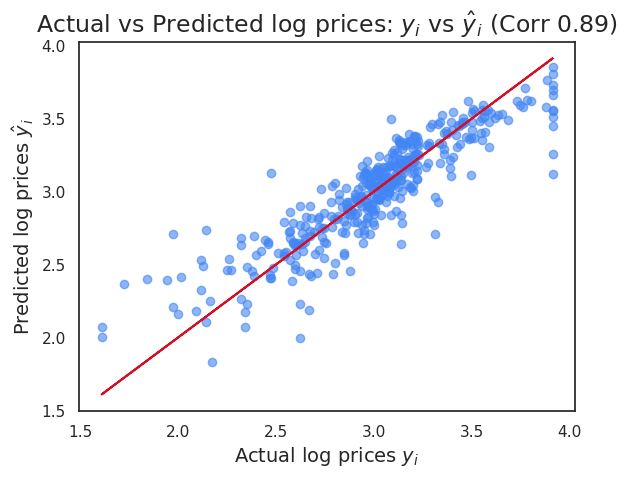

In [68]:
# Modified model: transformed (using logs prices) &you  simplified (dropping 2 features: INDUS and AGE)
prices = np.log(data['PRICE']) # Use log prices
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis=1) # We're dropping the price column from our dataset

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state=10) 

# Using statsmodel:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Residuals:
# residuals = y_train - results.fittedvalues # We could calculate the residuals like this, but statsmodel already has an attribute to retrieve them:
# results.resid

# Graph of Actual vs Predicted Prices
# Let's see how close are our predictions to the reality, how correlated this values are:
corr = round(y_train.corr(results.fittedvalues),2)
plt.scatter(x=y_train, y=results.fittedvalues, c="#4285F4", alpha=0.6)
plt.plot(y_train, y_train, c='#d50f25') # Line that represents perfect predictions

plt.title(f'Actual vs Predicted log prices: $y_i$ vs $\haty_i$ (Corr {corr})', fontsize=17)
plt.xlabel('Actual log prices $y_i$', fontsize=14)
plt.ylabel('Predicted log prices $\haty_i$', fontsize=14)

plt.show()

Let's reverse our log transformation, as looking at USD prices might be more intuitive:

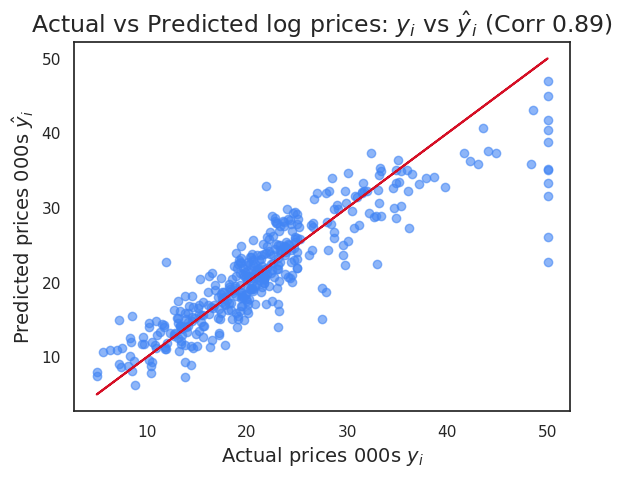

In [69]:
# Simplified model (dropping 2 features: INDUS and AGE)
prices = np.log(data['PRICE']) # Use log prices
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis=1) # We're dropping the price column from our dataset

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state=10) 

# Using statsmodel:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Residuals:
# residuals = y_train - results.fittedvalues # We could calculate the residuals like this, but statsmodel already has an attribute to retrieve them:
# results.resid

# Graph of Actual vs Predicted Prices
# Let's see how close are our predictions to the reality, how correlated this values are:
corr = round(y_train.corr(results.fittedvalues),2)
plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c="#4285F4", alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, c='#d50f25') # Line that represents perfect predictions

plt.title(f'Actual vs Predicted log prices: $y_i$ vs $\haty_i$ (Corr {corr})', fontsize=17)
plt.xlabel('Actual prices 000s $y_i$', fontsize=14)
plt.ylabel('Predicted prices 000s $\haty_i$', fontsize=14)

plt.show()

There's something pretty strange at the top prices: 50K USD. There's room for improvement in our model, although not sure if we can improve that. It seems related to the way data was collected.

Let's now continue with our residuals investigation. Let's plot them:

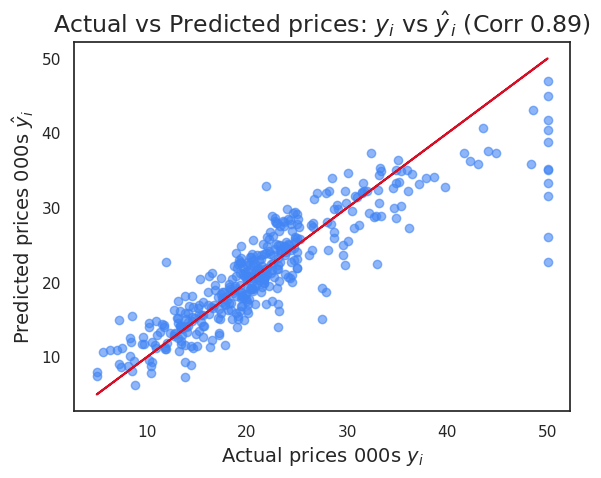

In [70]:
# Simplified model (dropping 2 features: INDUS and AGE)
prices = np.log(data['PRICE']) # Use log prices
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis=1) # We're dropping the price column from our dataset

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state=10) 

# Using statsmodel:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Residuals:
# residuals = y_train - results.fittedvalues # We could calculate the residuals like this, but statsmodel already has an attribute to retrieve them:
# results.resid

# Graph of Actual vs Predicted Prices
# Let's see how close are our predictions to the reality, how correlated this values are:
corr = round(y_train.corr(results.fittedvalues),2)
plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c="#4285F4", alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, c='#d50f25') # Line that represents perfect predictions

plt.title(f'Actual vs Predicted prices: $y_i$ vs $\haty_i$ (Corr {corr})', fontsize=17)
plt.xlabel('Actual prices 000s $y_i$', fontsize=14)
plt.ylabel('Predicted prices 000s $\haty_i$', fontsize=14)

# Mean Squared Error
winner_mse = round(results.mse_resid, 3)
winner_rsquared = round(results.rsquared, 3)

plt.show()

Let's now continue our residuals investigation. Let's plot them:

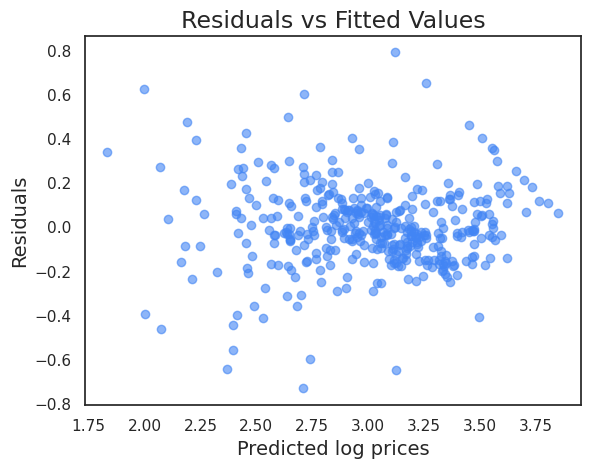

In [71]:
# Simplified model (dropping 2 features: INDUS and AGE)
prices = np.log(data['PRICE']) # Use log prices
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis=1) # We're dropping the price column from our dataset

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state=10) 

# Using statsmodel:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Residuals vs Predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, c="#4285F4", alpha=0.6)

plt.title('Residuals vs Fitted Values', fontsize=17)
plt.xlabel('Predicted log prices', fontsize=14)
plt.ylabel('Residuals', fontsize=14)

plt.show()

The distributtion looks pretty OK, residuals seems fairly distributed and symmetric, with most residuals in the center of the chart. The only issue could be that line at the top right corner, which corresponds to the 50K$ houses we spotted before.

Although the residuals distribution looks OK, let's confirm it by checking for normality with the mean and skew values, and plotting the distribution itself:

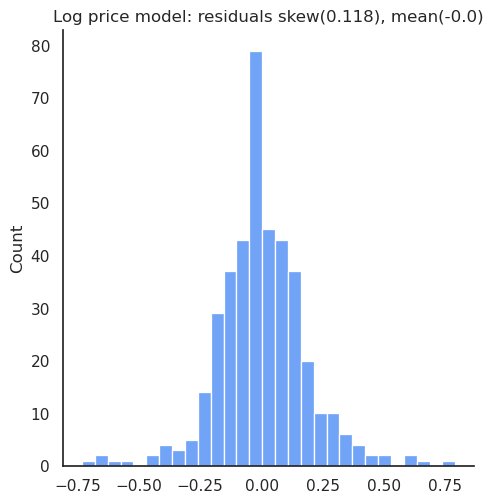

In [72]:
# Distribution of Residuals (log prices) - checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.displot(results.resid, color='#4285F4')
plt.title(f'Log price model: residuals skew({resid_skew}), mean({resid_mean})')
plt.show()

Mean = 0 isn't a surprise, linear regression models should always return that. Skew = 0.12 isn't perfect, but isn't bad either: residuals are pretty symetric, although we have longer tails than in a normal distribution.

Let's now generate the last 3 plots: Real vs Fitted values, Residuals vs Fitted values, and Residuals distribution, for the original model, before transforming data or dropping features.

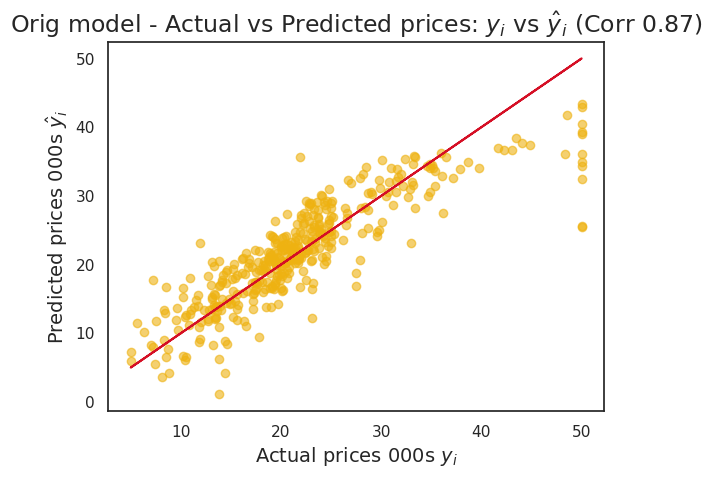

In [73]:
# Original model
prices = data['PRICE']
features = data.drop(['PRICE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state=10) 

# Using statsmodel:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()


# Graph of Actual vs Predicted Prices
corr = round(y_train.corr(results.fittedvalues),2)
plt.scatter(x=y_train, y=results.fittedvalues, c='#eeb211', alpha=0.6)
plt.plot(y_train, y_train, c='#d50f25') # Line that represents perfect predictions

plt.title(f'Orig model - Actual vs Predicted prices: $y_i$ vs $\haty_i$ (Corr {corr})', fontsize=17)
plt.xlabel('Actual prices 000s $y_i$', fontsize=14)
plt.ylabel('Predicted prices 000s $\haty_i$', fontsize=14)

plt.show()


# Mean Squared Error
original_mse = round(results.mse_resid, 3)
original_rsquared = round(results.rsquared, 3)

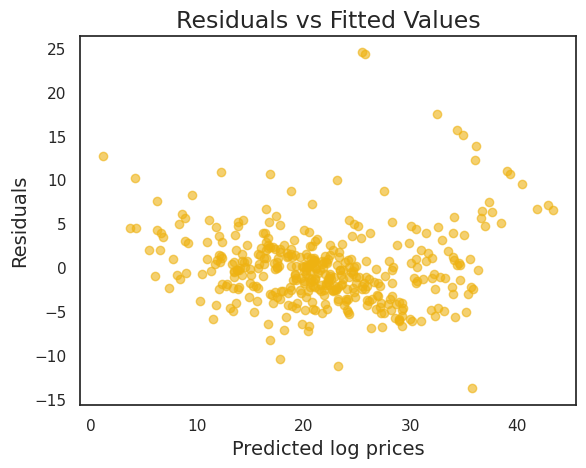

In [74]:
# Orig model - Residuals vs Predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, c='#eeb211', alpha=0.6)

plt.title('Residuals vs Fitted Values', fontsize=17)
plt.xlabel('Predicted log prices', fontsize=14)
plt.ylabel('Residuals', fontsize=14)

plt.show()

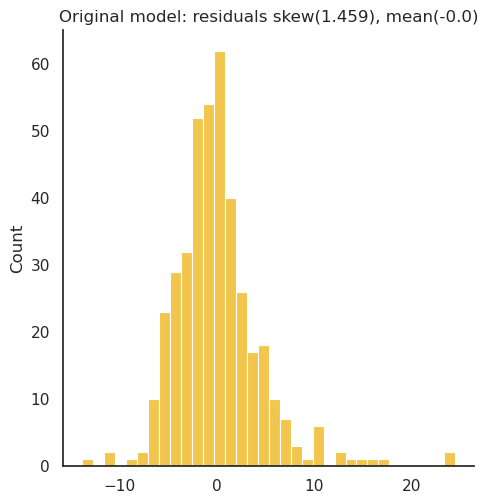

In [75]:
# Orig model - Distribution of Residuals (log prices) - checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.displot(results.resid, color='#eeb211')
plt.title(f'Original model: residuals skew({resid_skew}), mean({resid_mean})')
plt.show()

Conclusions:

- The predicted vs actual values graphs seem pretty similar. This makes sense, because the features correlation is quite similar too (2% difference).
- The Residuals vs Fitted values of the original model doesn't look entirely random. The points are prone to be in the bottom half of the graph, and they could be even drawing a subtle parabollic shape.
- The Residuals distribution graph seems quite more far away from a normal distribution, having a skew of almost 1.5.

## R-sqared & MSE

We've calculated the Mean Squared Error and the R-squared for both the original and the winner model (in the first graph cells). Let's compare them:

In [76]:
pd.DataFrame({'R-Squared': [winner_rsquared, original_rsquared],
             'MSE':[winner_mse, original_mse]},
            index =['Reduced log Model', 'Original Model'])

R-Squared     MSE
Reduced log Model      0.792   0.035
Original Model         0.750  19.921

- R-squared is always between 0 and 1. It's a relative measure, so it doesn't have any units. It doesn't scale with the data. We can see the simplified model has a higher fit than the original one.
- MSE is an absolute measure, and it has the same units as the target. The original model is in the unit of the target (thousands of dollars). We can't compare it with the winner model, as it has log prices in thousands, the scale is different. Remindr: lower values of MSE indicates a better fit, and an MSE of 0 indicates the perfect fit.

## Make predictions

We need to provide two things:
- Estimated price
- Range and confidence level. This depends on our distribution. We can quantify the variation of the mean in each point of a normal distribution. The distance from the mean to the right point where we can predict 68% of the predictions is called one "Standard Deviation" (STD or sigma). So, between -1STD and +1STD, we can predict 68% of the values. Between -2STD and +2STD, we can predict 95%. The distribution that tells us about how close we were to predicting correctly, is the **Residuals Distribution**.
If the distribution we need to take a look is the residuals distribution, how do we calculate the ranges for the 68% and 95%?

If we modify a bit our MSE equation, setting a squared root to the MSE, we come up with the Root Mean Squared Error (RMSE):
$$ RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}{\Big(y-\hat{y}\Big)^2}}$$
The RMSE is 1 STD in our residuals distribution. So here is how to calculate the ranges: Imagine we want to predict the range for 95% of our predictions. Our range would be:

$$ (-2\sigma,+2\sigma) = (-2RMSE,+2RMSE)$$

Let's add another column to our MSE and R-squared last table:

In [77]:
pd.DataFrame({'R-Squared': [winner_rsquared, original_rsquared],
             'MSE':[winner_mse, original_mse],
             'RMSE':np.sqrt([winner_mse, original_mse])},
            index =['Reduced log Model', 'Original Model'])

R-Squared     MSE      RMSE
Reduced log Model      0.792   0.035  0.187083
Original Model         0.750  19.921  4.463295

**Challenge:** Our estimate for a house price is $30,000. Calculate the upper and lower bound for a 95% prediction interval using the reduced log model.

In [78]:
print('1 STD in log prices is', np.sqrt(winner_mse))
print('2 STD in log prices is', 2*np.sqrt(winner_mse))

lower_bound = round(np.log(30)-2*np.sqrt(winner_mse),2)
upper_bound = round(np.log(30)+2*np.sqrt(winner_mse),2)

print('95% Interval in log prices is (', lower_bound,',',upper_bound,')')
print('95% Interval in normal prices is ($',
      round(np.e**lower_bound*1000,2),', $',round(np.e**upper_bound*1000,2),')')

1 STD in log prices is 0.18708286933869708
2 STD in log prices is 0.37416573867739417
95% Interval in log prices is ( 3.03 , 3.78 )
95% Interval in normal prices is ($ 20697.23 , $ 43816.04 )


Summary:
- We look at the RMSE when we want to understand the predictive power of our model. We could also use it to compare models: The narrower our 95% and 68% intervals are, the better.
- R-squared, in contrast, doesn't know anything about the prediction error.

## Valuation Tool

We'll build our Valuation Tool in a separate Notebook, as we want to make a module from it. Such notebook is in this same folder, and it's called "04 - Valuation Tool"